# Solver for the Maxwell-bloch equations w/ phase modulation.

***

## Equations:

Maxwell-bloch equation, after aproximations, with external phase modulation for $E_y$

$
\begin{cases}
\partial_{\tau} E_x=-k E_x + \mu P_x \\
\partial_{\tau} E_y=-k E_y + \mu P_y + i.(\Delta \phi_0 + m.cos(w_{mod}.\tau)).E_x \\
\partial_{\tau} P_{x,y}=-(1+i\delta)P_{x,y}+E_{x,y}.D \\
\partial_{\tau} D=-\gamma_{||}(D-D_0+\tfrac{1}{2}(E^*_{x,y}P_{x,y}+E_{x,y}P^*_{x,y})) \\
\end{cases}
$


with $ E_{x,y}$ and $P_{x,y}$  $\in \mathbb{C}$

##### Normalizations made: 
$\tau= \gamma_{\bot}.t$, $k=\tfrac{\bar{k}}{\gamma_{\bot}}$,  $\gamma_{\parallel}=\tfrac{\bar{\gamma_{\parallel}}}{\gamma_{\bot}}$, $\eta=\tfrac{z}{L}$, $\delta'_{ac}=\tfrac{w_a-w_0}{\gamma_{\bot}}$


##### Aproximations: 

1-$k,\gamma_{\parallel}<<\gamma_{\bot}$   -- Homogenously broadened laser linewidth $ \nabla^2 E-\frac{1}{c^2}\partial^2_{t}E=\alpha \partial^2_{t}E$

2-Plane wave: $\nabla^2_{\bot}=0$

3-Two level medium

4-Slowly varying amplitud

5-Unidirectional field

6-Rotating wave approx $\partial_{t^2}<<\partial_t$

7-Single longitudinal mode

8-$g'->0$, $R_0->1$  -- Uniform field limit

9-$m$,$w_{mod}<<1$, $w_{mod}<<\gamma_{\bot}$  ..chequear..

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 24 17:05:30 2015

@author: Alexis
"""
import numpy as np
#import scipy as sc
#import matplotlib
import matplotlib.pyplot as plt
#from scipy.integrate import odeint
#from numpy import linspace
#import math
#from matplotlib.collections import LineCollection
from comparefase import comparembfase
from intmbfase import intmbfase as int
#import datetime as dt
from time import localtime
#import time, sys
#import mpld3
from scipy.signal import argrelextrema


'''---- |2>
    ||
    || R21
    ||
   ---- |1>'''

plt.ion()
pi=np.pi #defino pi


### Parameters

In [16]:
'''parameters for normalization'''
a=2
gperp=10**8. #gamma perpendicular, loss rate
scale=1*(10.**6)/gperp #scale to micro seconds
wscale=1000*gperp/(10.**6)#scale frequency to khz

'''parameters for the equation'''
k=0.9*10.**7/gperp #normalized loss rate
mu=.25*10**(-4) #g
Dphi0=0.0 #phase shift [-pi,pi]
d=1.0 #detuning
g=2.5*10.**4/gperp #*((2*pi)**2) #sigma parallel, normalized loss rate
D0=a*k/mu #Poblation
m=.02 #modulation amplitud [0,1]
wf=wf=0.00474342
        #0.0026089#0.000474340.001*2*pi #modulation frequency

'''parameters to compare with the results'''
w_res=np.sqrt(k*g*((D0*mu/k)-1.))*wscale #resonance frequency
a=D0*mu/k
w=np.sqrt(k*g*(a-1.)-(g*g*a*a)/4)*wscale #Relaxation oscilations frequency
wf_real=wf*wscale


In [17]:
#%%latex
#print "Parameters: \n $\gamma_{\bot}=$  %s, $k=${{k}}, $\mu=${{mu}}, $\delta$={{d}} (detuning), $\gamma_{||}=${{g}}, $D_0=${{D0}}, \n Modulation parameters: $\Delta \phi_0$={{Dphi0}} (phase shift $[-\pi,\pi]$), $m=${{m}} (modulation amplitud $[0,1]$), $w_{mod}=${{wf}} (modulation frequency)" % gperp


In [18]:
%matplotlib inline

## Initial conditions, Integration and variables

In [19]:
'''initial conditions'''
intime=500.*5*10**(-6)*gperp #integration time

def  initial():
    initial=raw_input('Initial contitions: \n  Write "new" to use new defined initial conditions.  \n write "l" to use last result as initial condition. \n yinit: ')
    if initial=='new':
        '''User defined initial condition'''
        timeinit = np.arange(0., intime, 0.05)
        dfxinit=[1., 1.] 
        dfyinit=[-2.,  -1.9]  
        drxinit=[-3.,   1.]
        dryinit=[-9.34720367e+02 ,  7.31585718e+02]
        ddeltainit=[6.65973518e+03]
        yinit=np.array(dfxinit+dfyinit+drxinit+dryinit+ddeltainit)
    if initial=='l':
        '''initial condition from last simulation'''
        timeinit = np.arange(time[-1] ,intime+time[-1] , 0.5)
        yinit=y[-1]
    if initial=='':
        '''reuse last initial condition '''
    return yinit, timeinit

yinit, time=initial()
yinit1=np.copy(yinit)
yinit1[0]=yinit1[0]+yinit1[0]*10*np.finfo(float).eps
print '%.28f' %yinit[0], '%.28f' %yinit1[0]

Initial contitions: 
  Write "new" to use new defined initial conditions.  
 write "l" to use last result as initial condition. 
 yinit: l
0.0722456667659775175760472621 0.0722456667659776841095009559


In [20]:
'''integration'''
y, time=int(yinit,time,k,mu,Dphi0,d,g,D0,m,wf)
print 'Last result to use as new initial condition: \n', 'dfxinit=[%e, %e] \n dfyinit=[%e,  %e] \n drxinit=[%e, %e] \n dryinit=[%e,  %e] \n  ddeltainit=[%e] ' %(y[-1][0], y[-1][1], y[-1][2], y[-1][3], y[-1][4], y[-1][5], y[-1][6], y[-1][7], y[-1][8])


[-0.013807018253815478, -0.0059652398458507512, 0.020591047607956443, 0.0081183687519019929, -69.406979608263953, 24.126298842102869, 133.20624993037575, -51.177280145408986, -1.0204898615029378e-09]
Last result to use as new initial condition: 
dfxinit=[2.383769e-03, -2.363403e-02] 
 dfyinit=[-5.923251e-02,  2.267913e-01] 
 drxinit=[-6.965187e+01, -9.324217e+01] 
 dryinit=[5.390535e+02,  1.010727e+03] 
  ddeltainit=[6.649546e+03] 


In [21]:
'''intensitys'''
intensity_ex=np.sqrt(y[:,0]**2+y[:,1]**2)
intensity_ey=np.sqrt(y[:,2]**2+y[:,3]**2)
intensity=np.sqrt(y[:,0]**2+y[:,1]**2+y[:,2]**2+y[:,3]**2)


In [25]:
'''peaks'''
argrelextrema(intensity, np.greater)
intensity[argrelextrema(intensity, np.greater)[0]]



array([ 0.55227382,  0.45649533,  0.66969267,  0.38983462,  0.6902054 ,
        0.40840015,  0.65504703,  0.45616992,  0.61260184,  0.49612202,
        0.58205962,  0.5220826 ,  0.56355155,  0.5374704 ,  0.55333427,
        0.54616248,  0.54821426,  0.55088638,  0.54605174,  0.55335894,
        0.54552058,  0.5546105 ,  0.54583488,  0.5552375 ,  0.54654749,
        0.55557235,  0.54741497,  0.5557908 ,  0.54831215,  0.55598131,
        0.54917927,  0.55618296,  0.54999229,  0.55641133,  0.55074418,
        0.55666814,  0.55143636,  0.55695134,  0.55207375,  0.55725594,
        0.55266127,  0.55757774,  0.55320462,  0.5579124 ,  0.55370785,
        0.55825657,  0.554175  ,  0.55860769,  0.55460911,  0.5589634 ,
        0.55501246,  0.55932281,  0.55538718,  0.55968467,  0.55573405,
        0.56004882,  0.55605482,  0.56041479,  0.55634956,  0.56078307,
        0.55661888,  0.56115401,  0.5568628 ,  0.56152826,  0.557081  ,
        0.56190728,  0.55727318,  0.56229151,  0.55743869,  0.56

In [94]:
mmin=0.01
mmax=0.046
mn=np.arange(mmin, mmax+(mmax-mmin)/2. , (mmax-mmin)/2.) #10 pasos entre la resonancia y 0.1*resonancia
print mn

[ 0.01   0.028  0.046]


[ 0.01        0.02538233  0.02829278  0.03024429  0.0317539   0.03300195
  0.03407465  0.03502054  0.0358699   0.03664298  0.03735408  0.03801369
  0.03862975  0.03920842  0.03975461  0.04027227  0.04076466  0.04123449
  0.04168402  0.0421152   0.04252967  0.04292888  0.04331408  0.04368636
  0.0440467   0.04439594  0.04473486  0.04506413  0.04538439  0.04569618
  0.046       0.04629632]


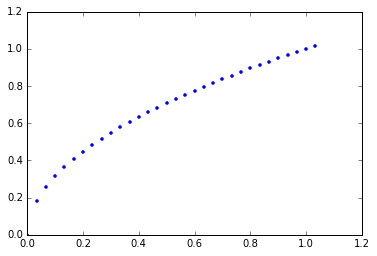

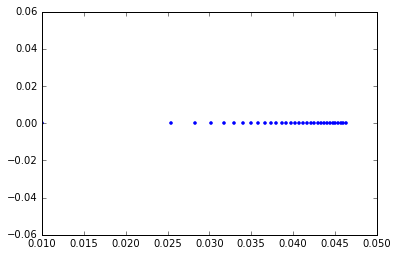

In [104]:
mn=np.arange(0., 1+(1)/30. , 1/30.) #10 pasos entre la resonancia y 0.1*resonancia
plt.plot(mn,mn**(0.5),'.b')
mn=np.sqrt(mn**(0.5))
mn=((mmax-mmin)*mn+mmin)
fig=plt.figure()
plt.plot(mn,np.zeros_like(mn),'.b')
print mn


In [26]:
print argrelextrema(intensity, np.greater)
print intensity[argrelextrema(intensity, np.greater)[0]]


(array([     8,     24,     39, ..., 499946, 499964, 499986], dtype=int64), array([3, 6, 2, ..., 4, 0, 7], dtype=int64))
[ 0.39970917  0.40415636  0.4084096  ...,  0.23774186  0.23684517
  0.23598504]


## Plots

In [27]:
'''plots'''
save=False #set True if i want to save files automatically


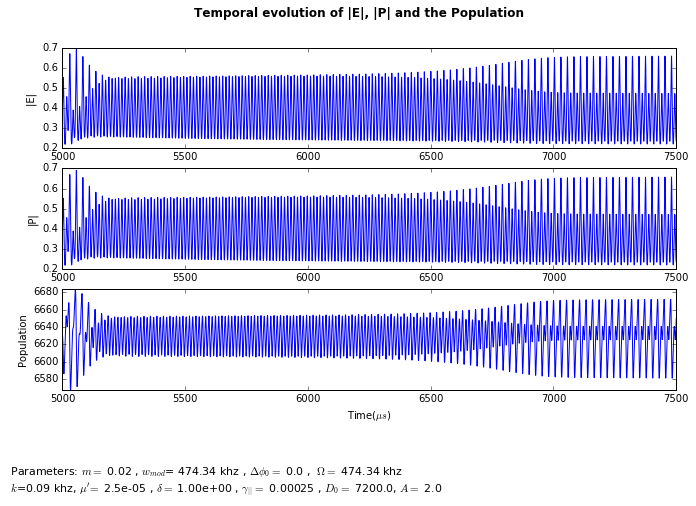

In [28]:

fig0=plt.figure()
fig0.suptitle('Temporal evolution of |E|, |P| and the Population', fontsize=12, fontweight='bold')
ax1 = fig0.add_subplot(3, 1, 1)
ax1.plot(time*scale,intensity)
ax1.set_ylabel('|E| ')
ax1.set_xlim(min(time*scale), max(time*scale))
ax2 = fig0.add_subplot(3, 1, 2)
ax2.set_xlim(min(time*scale), max(time*scale))
ax2.plot(time*scale,intensity)
ax2.set_ylabel('|P|')
ax3 = fig0.add_subplot(3, 1, 3)
ax3.plot(time*scale,y[:,8])
plt.ylim(min(y[:,8]), max(y[:,8]))
ax3.set_ylabel('Population')
ax3.set_xlim(min(time*scale), max(time*scale))
plt.xlabel('Time($\mu s$)')
plt.text(-0.09,-1.05, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax3.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig0.set_size_inches(11, 7)

if save==True: 
    fname='%d_%d_%d-%d.%d.%d-Time_series.png' % localtime()[0:6]
    fig0.savefig(fname) 

#mpld3.display(fig0)



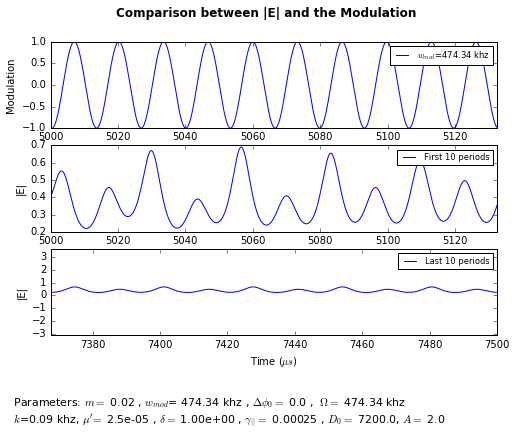

In [29]:
fig4=plt.figure()
periods=10
fig4.suptitle('Comparison between |E| and the Modulation', fontsize=12, fontweight='bold')
ax1 = fig4.add_subplot(3, 1, 1)
ax1.plot(time*scale,np.cos(wf*time), label='$w_{mod}$=%.2f khz' %wf_real)
ax1.set_xlim(min(time*scale), min(time*scale)+(periods*2*pi/wf)*scale)
ax1.set_ylabel('Modulation ')
ax1.legend(fontsize = 'small')
ax2 = fig4.add_subplot(3, 1, 2)
ax2.plot(time*scale,intensity,label='First %i periods' %periods)
ax2.set_ylabel('|E|')
ax2.set_xlim(min(time*scale), min(time*scale)+(periods*2*pi/wf)*scale)
ax2.legend(fontsize = 'small')
ax3 = fig4.add_subplot(3, 1, 3)
ax3.set_xlim(max(time*scale)-(periods*2*pi/wf)*scale, max(time*scale),emit='True')
ax3.plot(time*scale,intensity,label='Last %i periods' %periods)
ax3.set_ylim(intensity[len(intensity)-1]-8*(max(intensity[len(intensity)-9000:])-intensity[len(intensity)-1]),intensity[len(intensity)-1]+8*(max(intensity[len(intensity)-9000:])-intensity[len(intensity)-1]))
ax3.set_ylabel('|E|')
ax3.legend(fontsize = 'small')
plt.text(-0.09,-1.06, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax3.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig4.set_size_inches(8, 6)
plt.xlabel('Time ($\mu s$)')
#ax3.relim(visible_only=True)
#ax3.autoscale_view(tight=True, scalex=True, scaley=True)
#ax3.yaxis.zoom(3)
#ax3.yaxis.set_smart_bounds('True')
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-comparison periods.png' % localtime()[0:6]
    fig4.savefig(fname, dpi = 100)# when saving, specify the DPI

j=0 #LONGITUD EN INDICES DE 10 PERIODOS
print len(time)
for i in range(len(time)):
    while time[i]*scale < min(time*scale)+(periods*2*pi/wf)*scale:
        j=i
print j

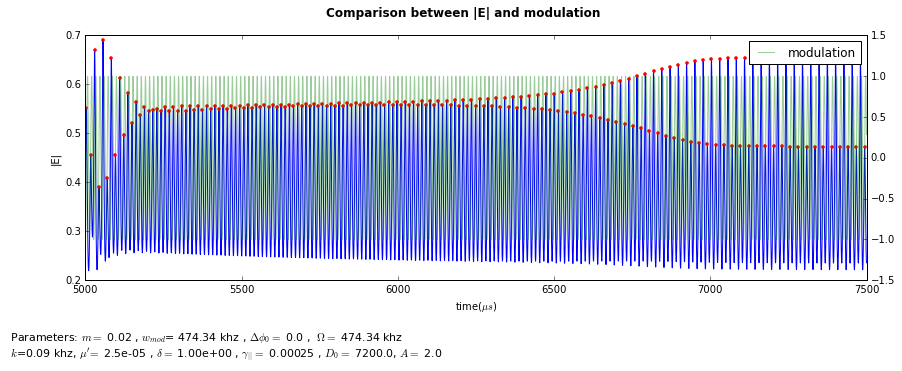

In [32]:

fig5=plt.figure()
fig5.suptitle('Comparison between |E| and modulation', fontsize=12, fontweight='bold')
ax1 = fig5.add_subplot(111)
ax1.plot(time*scale,intensity,'b', label='|E|')
ax1.plot(time[argrelextrema(intensity, np.greater)[0]]*scale,intensity[argrelextrema(intensity, np.greater)[0]],'.r', label='|E|')
ax2=ax1.twinx()
ax2.plot(time*scale,np.cos(wf*time),'g', alpha=0.4, label='modulation')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('|E|')
plt.xlim(min(time*scale), max(time*scale))
ax2.set_ylim(-1.5, 1.5)
#ax2.set_ylim(-intensity[len(intensity)-1, intensity[len(intensity)-1 )
plt.text(-0.1,-0.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig5.set_size_inches(14, 5)
plt.legend()
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-comparison.png' % localtime()[0:6]
    fig5.savefig(fname, dpi = 100)# when saving, specify the DPI

[[0, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,

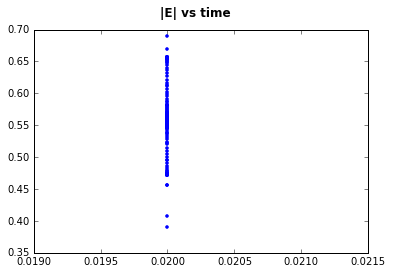

In [46]:
fig=plt.figure()
fig.suptitle('|E| vs time', fontsize=12, fontweight='bold')
ax1 = fig.add_subplot(111)
peak_coor=argrelextrema(intensity, np.greater)
peak_max=list(set(intensity[argrelextrema(intensity, np.greater)[0]]))
m_peaks=list(m*np.ones_like(peak_max))
peaks=[[0], [0]]
peaks[0]=peaks[0]+m_peaks
peaks[1]=peaks[1]+peak_max
ax1.plot(peaks[0][1:],peaks[1][1:],'.b')

print peaks

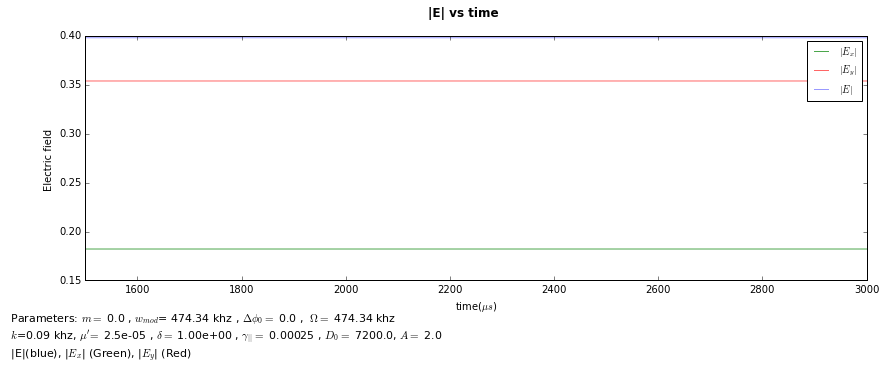

In [149]:
fig3=plt.figure()
fig3.suptitle('|E| vs time', fontsize=12, fontweight='bold')
ax1 = fig3.add_subplot(111)
plt.plot(time*scale,intensity_ex,'g', alpha=0.7,  label='$|E_x|$')
plt.plot(time*scale,intensity_ey,'r', alpha=0.6,  label='$|E_y|$')
plt.plot(time*scale,intensity,'b', alpha=0.4, label='$|E|$')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('Electric field ')
plt.xlim(min(time*scale), max(time*scale))
plt.text(-0.1,-.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f \n |E|(blue), |$E_x$| (Green), |$E_y$| (Red)" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
plt.legend(fontsize = 'medium')
fig3.set_size_inches(14, 5)

if save==True: 
    fname='%d_%d_%d-%d.%d.%d-E_intensitys.png' % localtime()[0:6]
    fig3.savefig(fname, dpi = 100)# when saving, specify the DPI


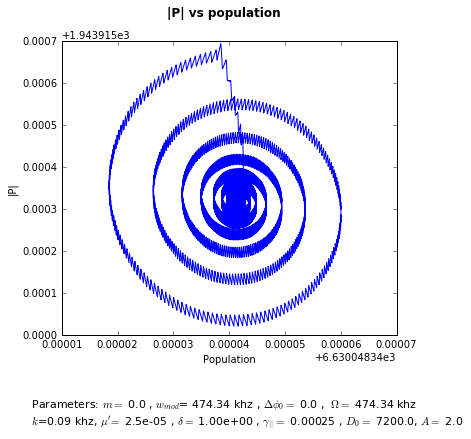

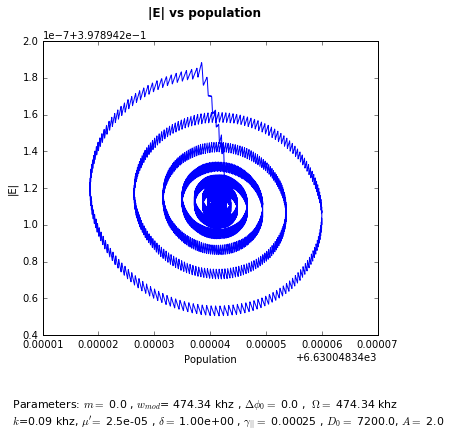

In [150]:
'''Phase spaces'''
fig8=plt.figure()
fig8.suptitle('|P| vs population', fontsize=12, fontweight='bold')
ax2 = fig8.add_subplot(111)
plt.plot(y[:,8], np.sqrt(y[:,4]**2+y[:,5]**2+y[:,6]**2+y[:,7]**2))
ax2.set_xlabel('Population')
ax2.set_ylabel('|P|')
plt.text(-0.1,-.32, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax2.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig8.set_size_inches(6, 6)
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-p_vs_population.png' % localtime()[0:6]
    fig8.savefig(fname) 

fig9=plt.figure()
fig9.suptitle('|E| vs population', fontsize=12, fontweight='bold')
ax2 = fig9.add_subplot(111)
plt.plot(y[:,8], intensity)
ax2.set_xlabel('Population')
ax2.set_ylabel('|E|')
plt.text(-0.1,-.32, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax2.transAxes)   
plt.subplots_adjust(bottom=0.22)
fig9.set_size_inches(6, 6)
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-E_vs_population.png' % localtime()[0:6]
    fig9.savefig(fname, dpi = 100)# when saving, specify the DPI
 

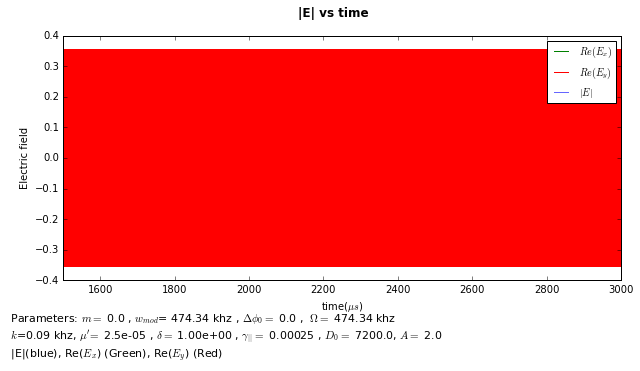

In [151]:
fig1=plt.figure()
fig1.suptitle('|E| vs time', fontsize=12, fontweight='bold')
ax1 = fig1.add_subplot(111)
ax1.plot(time*scale,y[:,0],'g', label='$Re(E_x)$')
ax1.plot(time*scale,y[:,2],'r', label='$Re(E_y)$')
ax1.plot(time*scale,intensity,'b', alpha=0.6,label='$|E|$')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('Electric field')
plt.xlim(min(time*scale), max(time*scale))
plt.text(-0.1,-.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f \n |E|(blue), Re($E_x$) (Green), Re($E_y$) (Red)" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
plt.legend(fontsize = 'medium')
fig1.set_size_inches(10, 5)

if save==True: 
    fname='%d_%d_%d-%d.%d.%d-Re(E).png' % localtime()[0:6]
    fig1.savefig(fname) 

    

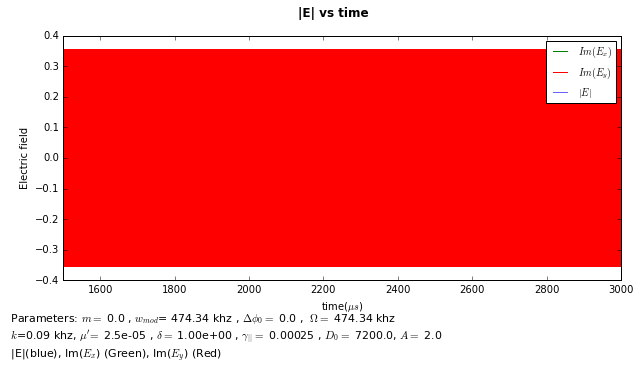

In [152]:
fig2=plt.figure()
fig2.suptitle('|E| vs time', fontsize=12, fontweight='bold')
ax1 = fig2.add_subplot(111)
ax1.plot(time*scale,y[:,1],'g', label='$Im(E_x)$')
ax1.plot(time*scale,y[:,3],'r', label='$Im(E_y)$')
ax1.plot(time*scale,intensity,'b', alpha=0.6, label='$|E|$')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('Electric field')
plt.xlim(min(time*scale), max(time*scale))
plt.text(-0.1,-.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f \n |E|(blue), Im($E_x$) (Green), Im($E_y$) (Red)" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
plt.legend(fontsize = 'medium')
fig2.set_size_inches(10, 5)

if save==True: 
    fname='%d_%d_%d-%d.%d.%d-Im(E).png' % localtime()[0:6]
    fig2.savefig(fname) 

'''codigo para comparar dos trayectorias cercanas'''

y1, time=int(yinit1,time,k,mu,Dphi0,d,g,D0,m,wf)

'''intensitys'''
intensity1_ex=np.sqrt(y1[:,0]**2+y1[:,1]**2)
intensity1_ey=np.sqrt(y1[:,2]**2+y1[:,3]**2)
intensity1=np.sqrt(y1[:,0]**2+y1[:,1]**2+y1[:,2]**2+y1[:,3]**2)

'''plot para comparar dos trayectorias cercanas'''
fig9=plt.figure()
fig9.suptitle('|E| vs time', fontsize=12, fontweight='bold')
ax1 = fig9.add_subplot(111)
#plt.plot(time*scale,intensity_ex,'g', alpha=0.7,  label='$|E_x|$')
#plt.plot(time*scale,intensity1_ex,'r', alpha=0.6,  label='$|E_x|$')
plt.plot(time*scale,intensity,'b', label='$|E|$')
plt.plot(time*scale,intensity1,'r',  label='$|E|$')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('|E| ')
plt.xlim(min(time*scale), max(time*scale))
plt.text(-0.1,-.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f \n |E|(blue), |$E_x$| (Green), |$E_y$| (Red)" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
plt.legend(fontsize = 'medium')
fig9.set_size_inches(14, 5)
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-Near_trayectorys.png' % localtime()[0:6]
    fig9.savefig(fname, dpi = 100)# when saving, specify the DPI
    
fig9=plt.figure()
fig9.suptitle('Trayectory difference', fontsize=12, fontweight='bold')
ax1 = fig9.add_subplot(111)
#plt.plot(time*scale,intensity_ex,'g', alpha=0.7,  label='$|E_x|$')
#plt.plot(time*scale,intensity1_ex,'r', alpha=0.6,  label='$|E_x|$')
plt.plot(time*scale,intensity-intensity1,'r', alpha=0.4, label='$|E|-|\hat{E}|$')
ax1.set_xlabel('time($\mu s$)')
ax1.set_ylabel('Trayectory difference $|E|-|\hat{E}|$' )
plt.xlim(min(time*scale), max(time*scale))
plt.text(-0.1,-.33, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %.2f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f \n |E|(blue), |$E_x$| (Green), |$E_y$| (Red)" % (m,wf_real, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax1.transAxes)   
plt.subplots_adjust(bottom=0.22)
plt.legend(fontsize = 'medium')
fig9.set_size_inches(14, 5)
if save==True: 
    fname='%d_%d_%d-%d.%d.%d-Trayectory_dif.png' % localtime()[0:6]
    fig9.savefig(fname, dpi = 100)# when saving, specify the DPI

In [153]:
#fig5=plt.figure()
#ax1 = fig5.add_subplot(111)
#f1=plt.plot(time,y[:,0])
#f1=plt.plot(time,y[:,2])
#fig5.suptitle('E_x  & E_y vs tiempo', fontsize=12, fontweight='bold')
#ax1.set_xlabel('time(ms) ')
#ax1.set_ylabel('E ')
#plt.xlim(min(time), max(time))
#plt.text(-0.1,-1.04, "\n Parameters: $m= $ %s , $w_{mod}$= %.2f khz , $\Delta \phi_0=$ %s ,  $\Omega=$ %f khz \n $k$=%.2f khz, $\mu'=$ %s , $\delta= $ %.2e , $\gamma_{||}=$ %s , $D_0=$ %s, $A=$ %.1f " % (m,wf, Dphi0, w_res ,k,mu, d, g, D0, a), fontsize=11, transform=ax3.transAxes)   
#plt.subplots_adjust(bottom=0.22)
#fig1.savefig('moduloE_fasemodulada.png')


In [154]:
'''comparison between the solution with and without modulation'''
def comp():
    comparembfase(y,yinit,time,k,mu,Dphi0,d,g,D0,m,wf)

#comp()

Notebook style:

In [155]:
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())

a hacer:
    
    - barrido en frecuencia hacia la resonancia.
    - barrido en m, en la frecuencia de resonancia.
    - mapa de prametros usados